In [2]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.listdir('C:/Users/kasha/Downloads/')

['.ipynb_checkpoints',
 '800px_COLOURBOX2786290.jpg',
 'A-Hackers-AI-Voice-Assistant-master',
 'B9ECED6F.ASUSPCAssistant_qmba6cd70vzyy!App',
 'cache',
 'Certificate New York, United States of America 2.pdf',
 'CSC 490',
 'DAT101x Lab 4 - Machine Learning.pdf',
 'DATA 350',
 'DATA350_lab4.pdf',
 'DATA350_lab6.pdf',
 'desktop.ini',
 'il_340x270.3111380161_pp1a.jpg',
 'Lab5.py',
 'Learning Python, 5th Edition.pdf',
 'MATH 420',
 'MATH-420-Exam-1_review.pdf',
 'Midterm1 (1).py',
 'Midterm1.ipynb',
 'Midterm1.py',
 'pexels-iconcom-216695.jpg',
 'pima-indians-diabetes.csv',
 'speechRecognition.ipynb',
 'tensorflow-speech-recognition-challenge',
 'testGit']

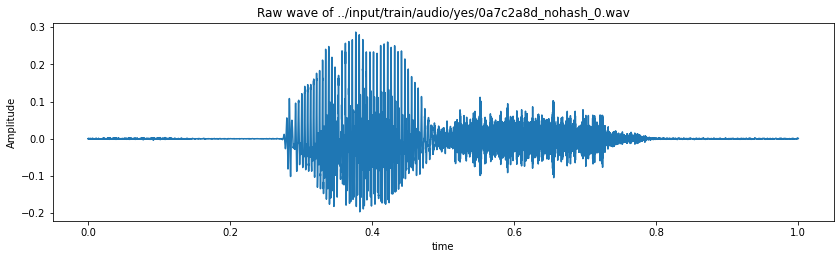

In [6]:
train_audio_path = 'C:/Users/kasha/Downloads/tensorflow-speech-recognition-challenge/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr=16000)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [7]:
ipd.Audio(samples, rate=sample_rate)

In [8]:
print(sample_rate)

16000


In [9]:
#Resampling
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [10]:
labels=os.listdir(train_audio_path)

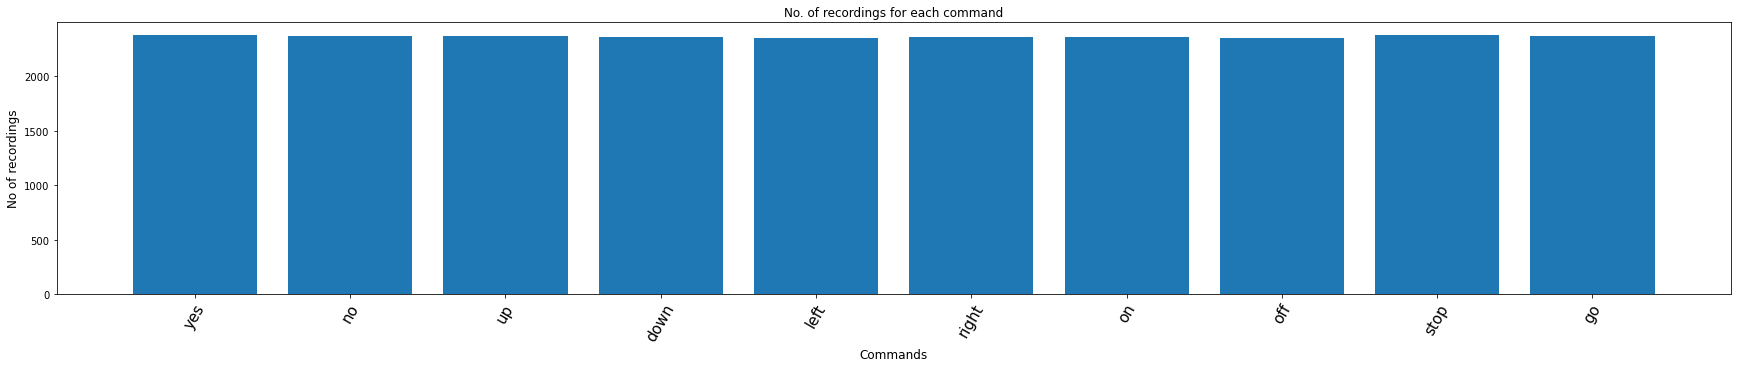

In [13]:
#understanding number of recordings
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [14]:
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <BarContainer object of 10 artists>)

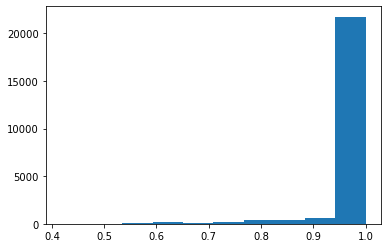

In [16]:
#understanding the duration of each recordings
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))